In [12]:
import pandas as pd

df = pd.read_csv ('PilgubJatim1.csv')

In [13]:
import pandas as pd
import re

# Baca file CSV
try:
    df = pd.read_csv("PilgubJatim1.csv")
except FileNotFoundError:
    print("File 'PilgubJatim1.csv' tidak ditemukan. Pastikan file ada di direktori yang sama.")
    exit()

# Pastikan kolom 'full_text' ada di DataFrame
if 'full_text' not in df.columns:
    print("Kolom 'full_text' tidak ditemukan dalam file CSV.")
    exit()

# Fungsi untuk menghapus hashtag
def remove_hashtags(text):
    # Regex untuk menemukan kata yang diawali dengan #
    # Ini akan menghapus tagar beserta kata yang mengikutinya
    # Jika hanya ingin menghapus simbol '#' saja, gunakan: text.replace('#', '')
    if isinstance(text, str):
        return re.sub(r'#\w+', '', text).strip()
    return text # Kembalikan nilai asli jika bukan string (misalnya NaN)

# Terapkan fungsi ke kolom 'full_text'
df['full_text_no_hashtags'] = df['full_text'].apply(remove_hashtags)

# Tampilkan beberapa baris pertama dari kolom asli dan kolom yang sudah dibersihkan
print("Contoh data sebelum dan sesudah penghapusan hashtag:")
print(df[['full_text', 'full_text_no_hashtags']].head())

# Opsional: Simpan DataFrame yang sudah dibersihkan ke file CSV baru
df.to_csv("PilgubJatim1_no_hashtags.csv", index=False)
print("\nFile baru 'PilgubJatim1_no_hashtags.csv' telah disimpan.")

# Opsional: Jika ingin mengganti kolom asli
# df['full_text'] = df['full_text'].apply(remove_hashtags)
# print("\nKolom 'full_text' telah diperbarui.")
# print(df['full_text'].head())
# df.to_csv("PilgubJatim1_updated.csv", index=False)
# print("\nFile 'PilgubJatim1_updated.csv' dengan kolom 'full_text' yang diperbarui telah disimpan.")

Contoh data sebelum dan sesudah penghapusan hashtag:
                                           full_text  \
0  Rocky Gerung : Hanya #Risma bukan dari Oligark...   
1  #TemanPemilih KPU Kota Probolinggo Menggelar D...   
2  Ada urban festival juga lho! Waktunya seru-ser...   
3  Semanggi Suroboyo siap bikin suasana makin pec...   
4  Jumat 22 Nov 2024. Tulis di kalender jangan sa...   

                               full_text_no_hashtags  
0  Rocky Gerung : Hanya  bukan dari Oligarki http...  
1  KPU Kota Probolinggo Menggelar Debat Publik Ke...  
2  Ada urban festival juga lho! Waktunya seru-ser...  
3  Semanggi Suroboyo siap bikin suasana makin pec...  
4  Jumat 22 Nov 2024. Tulis di kalender jangan sa...  

File baru 'PilgubJatim1_no_hashtags.csv' telah disimpan.


In [7]:
jumlah_data = df.shape[0]
print("JUMLAH DATA: ", jumlah_data)

display(df.head(5))

JUMLAH DATA:  2081


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,full_text_no_hashtags
0,1859986705195147314,Fri Nov 22 15:46:02 +0000 2024,1,Rocky Gerung : Hanya #Risma bukan dari Oligark...,1859986705195147314,NaN,NaN,in,Surabaya,0,1,0,https://x.com/beritajatimcom/status/1859986705...,21287066,beritajatimcom,Rocky Gerung : Hanya bukan dari Oligarki http...
1,1859966998836605143,Fri Nov 22 14:27:43 +0000 2024,2,#TemanPemilih KPU Kota Probolinggo Menggelar D...,1859966998836605143,https://pbs.twimg.com/media/Gc_uGmAaoAESR-A.jpg,NaN,in,"Kota Probolinggo, Jawa Timur",0,0,0,https://x.com/KPUKotaProb/status/1859966998836...,721915735279214593,KPUKotaProb,KPU Kota Probolinggo Menggelar Debat Publik Ke...
2,1859927370121334948,Fri Nov 22 11:50:15 +0000 2024,0,Ada urban festival juga lho! Waktunya seru-ser...,1859927370121334948,https://pbs.twimg.com/media/Gc_KFBpaYAA_SQM.jpg,NaN,in,NaN,0,0,0,https://x.com/Cokiecokieenyuu/status/185992737...,1842159008016375808,Cokiecokieenyuu,Ada urban festival juga lho! Waktunya seru-ser...
3,1859927082337509586,Fri Nov 22 11:49:06 +0000 2024,0,Semanggi Suroboyo siap bikin suasana makin pec...,1859927082337509586,https://pbs.twimg.com/media/Gc_J0AmaIAAH_WX.jpg,NaN,in,NaN,0,0,0,https://x.com/KalianLain/status/18599270823375...,1561032351194697733,KalianLain,Semanggi Suroboyo siap bikin suasana makin pec...
4,1859926866838335984,Fri Nov 22 11:48:15 +0000 2024,0,Jumat 22 Nov 2024. Tulis di kalender jangan sa...,1859926866838335984,https://pbs.twimg.com/media/Gc_Jn4JbsAAkrCz.jpg,NaN,in,NaN,0,0,0,https://x.com/golonganpemuda/status/1859926866...,1834546620542615552,golonganpemuda,Jumat 22 Nov 2024. Tulis di kalender jangan sa...


case folding

In [14]:
import pandas as pd

df = pd.read_csv('PilgubJatim1_no_hashtags.csv')

case_folding = []
for w in df ['full_text_no_hashtags']:
    if isinstance(w, str):
        data = w.lower()
        case_folding.append(data)
    else:
        case_folding.append('')

df.loc[:, 'case_folded'] = case_folding

jumlah_data = df.shape[0]
print("Jumlah Data")

display(df.loc[:9,  ['full_text_no_hashtags', 'case_folded']])

Jumlah Data


,full_text_no_hashtags,case_folded
0,Rocky Gerung : Hanya bukan dari Oligarki http...,rocky gerung : hanya bukan dari oligarki http...
1,KPU Kota Probolinggo Menggelar Debat Publik Ke...,kpu kota probolinggo menggelar debat publik ke...
2,Ada urban festival juga lho! Waktunya seru-ser...,ada urban festival juga lho! waktunya seru-ser...
3,Semanggi Suroboyo siap bikin suasana makin pec...,semanggi suroboyo siap bikin suasana makin pec...
4,Jumat 22 Nov 2024. Tulis di kalender jangan sa...,jumat 22 nov 2024. tulis di kalender jangan sa...
5,Gak sabar nge-Gas bareng di DBL Arena! ...,gak sabar nge-gas bareng di dbl arena! ...
6,Sebagai respons terhadap insiden tersebut Hera...,sebagai respons terhadap insiden tersebut hera...
7,Jubir muda pasangan calon di Pilgub Jatim nomo...,jubir muda pasangan calon di pilgub jatim nomo...
8,Jubir muda pasangan calon di Pilgub Jatim nomo...,jubir muda pasangan calon di pilgub jatim nomo...
9,Jubir muda pasangan calon di Pilgub Jatim nomo...,jubir muda pasangan calon di pilgub jatim nomo...


Proses Cleansing

In [15]:
import re
import pandas as pd

def clean_text(text):
    text = re.sub(r'\d+', '', text)

    text = re.sub(r'#\w+', '', text)

    text = re.sub(r'http\S+', '', text)

    text = re.sub(r'[^a-zA-Z\s]+', '', text)
    return text

df['cleaned'] = df['case_folded'].apply(clean_text)

df.dropna(subset=['cleaned'], inplace=True)

df.dropna(subset=['full_text'], inplace=True)

jumlah_data = df.shape[0]
print ("jummlah data setelag penghapusan barus kosong: ", jumlah_data)

display(df.loc[:2, ['case_folded', 'cleaned']])

jummlah data setelag penghapusan barus kosong:  2080


,case_folded,cleaned
0,rocky gerung : hanya bukan dari oligarki http...,rocky gerung hanya bukan dari oligarki
1,kpu kota probolinggo menggelar debat publik ke...,kpu kota probolinggo menggelar debat publik ke...
2,ada urban festival juga lho! waktunya seru-ser...,ada urban festival juga lho waktunya seruserua...


Proses Tokenization

In [13]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fajar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fajar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fajar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
import nltk
from nltk.tokenize import word_tokenize

df['tokens'] = df['cleaned'].apply(word_tokenize)

jumlah_data = df.shape[0]
print ("jumlah data setelah penghapusan barus kosong dan tokenisasi :", jumlah_data)

display(df.loc[:4, ['cleaned', 'tokens']])

jumlah data setelah penghapusan barus kosong dan tokenisasi : 2080


,cleaned,tokens
0,rocky gerung hanya bukan dari oligarki,"[rocky, gerung, hanya, bukan, dari, oligarki]"
1,kpu kota probolinggo menggelar debat publik ke...,"[kpu, kota, probolinggo, menggelar, debat, pub..."
2,ada urban festival juga lho waktunya seruserua...,"[ada, urban, festival, juga, lho, waktunya, se..."
3,semanggi suroboyo siap bikin suasana makin pec...,"[semanggi, suroboyo, siap, bikin, suasana, mak..."
4,jumat nov tulis di kalender jangan sampai ke...,"[jumat, nov, tulis, di, kalender, jangan, samp..."


Proses Normalisasi Kata

In [17]:
def normalisasi_kata(tokens, kamus):
    normalized_tokens = []
    for token in tokens:
        if token.lower() in kamus:
            normalized_tokens.extend(kamus[token.lower()].split())  # Menambahkan kata yang sudah dinormalisasi
        else:
            normalized_tokens.append(token)  # Menambahkan kata yang tidak perlu dinormalisasi
    return normalized_tokens  # Pastikan return di luar loop agar memproses semua token

kamus_path = 'kbba.txt'
with open(kamus_path, 'r') as file:
    kamus = {}
    for line in file:
        line = line.strip().split('\t')
        if len(line) == 2:
            kata_asli = line[0]
            kata_normalisasi = line[1]
            kamus[kata_asli] = kata_normalisasi

df['tokens'] = df['cleaned'].apply(word_tokenize)

teks_asli = df['tokens'].apply(lambda tokens: ' '.join(tokens))

df['tokens_normalized'] = df['tokens'].apply(lambda tokens: normalisasi_kata(tokens, kamus))

jumlah_data = df.shape[0]
print("Jumlah data setelah penghapusan baris kosong, tokenisasi, dan normalisasi:", jumlah_data)

display(df.loc[:10, ['tokens', 'tokens_normalized']])


Jumlah data setelah penghapusan baris kosong, tokenisasi, dan normalisasi: 2080


,tokens,tokens_normalized
0,"[rocky, gerung, hanya, bukan, dari, oligarki]","[rocky, gerung, hanya, bukan, dari, oligarki]"
1,"[kpu, kota, probolinggo, menggelar, debat, pub...","[kpu, kota, probolinggo, menggelar, debat, pub..."
2,"[ada, urban, festival, juga, lho, waktunya, se...","[ada, urban, festival, juga, lho, waktunya, se..."
3,"[semanggi, suroboyo, siap, bikin, suasana, mak...","[semanggi, suroboyo, siap, bikin, suasana, mak..."
4,"[jumat, nov, tulis, di, kalender, jangan, samp...","[jumat, nov, tulis, di, kalender, jangan, samp..."
5,"[gak, sabar, ngegas, bareng, di, dbl, arena]","[tidak, sabar, ngegas, bareng, di, dbl, arena]"
6,"[sebagai, respons, terhadap, insiden, tersebut...","[sebagai, respons, terhadap, insiden, tersebut..."
7,"[jubir, muda, pasangan, calon, di, pilgub, jat...","[juru, bicara, muda, pasangan, calon, di, pilg..."
8,"[jubir, muda, pasangan, calon, di, pilgub, jat...","[juru, bicara, muda, pasangan, calon, di, pilg..."
9,"[jubir, muda, pasangan, calon, di, pilgub, jat...","[juru, bicara, muda, pasangan, calon, di, pilg..."


Proses Stopword

In [18]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
from IPython.display import display

stopwords_indonesia = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in stopwords_indonesia]
    return filtered_tokens

df['tokens_no_stopwords'] = df['tokens_normalized'].apply(remove_stopwords)

jumlah_data = df.shape[0]
print("jumlah data setelah penghapusan baris kosong, tookenisasi, normalisasi, dan stopword removal:", jumlah_data)

display(df.loc[:9, ['tokens_normalized', 'tokens_no_stopwords']])

jumlah data setelah penghapusan baris kosong, tookenisasi, normalisasi, dan stopword removal: 2080


,tokens_normalized,tokens_no_stopwords
0,"[rocky, gerung, hanya, bukan, dari, oligarki]","[rocky, gerung, oligarki]"
1,"[kpu, kota, probolinggo, menggelar, debat, pub...","[kpu, kota, probolinggo, menggelar, debat, pub..."
2,"[ada, urban, festival, juga, lho, waktunya, se...","[urban, festival, lho, seruseruan]"
3,"[semanggi, suroboyo, siap, bikin, suasana, mak...","[semanggi, suroboyo, bikin, suasana, pecah]"
4,"[jumat, nov, tulis, di, kalender, jangan, samp...","[jumat, nov, tulis, kalender, ketinggalan]"
5,"[tidak, sabar, ngegas, bareng, di, dbl, arena]","[sabar, ngegas, bareng, dbl, arena]"
6,"[sebagai, respons, terhadap, insiden, tersebut...","[respons, insiden, heraldha, menjaga, suasana,..."
7,"[juru, bicara, muda, pasangan, calon, di, pilg...","[juru, bicara, muda, pasangan, calon, pilgub, ..."
8,"[juru, bicara, muda, pasangan, calon, di, pilg...","[juru, bicara, muda, pasangan, calon, pilgub, ..."
9,"[juru, bicara, muda, pasangan, calon, di, pilg...","[juru, bicara, muda, pasangan, calon, pilgub, ..."


Proses Stemming

In [19]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd
from IPython.display import display

stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

def stem_tokens(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

df['tokens_stemmed'] = df['tokens_no_stopwords'].apply(stem_tokens)

jumlah_data = df.shape[0]
print("Jumlah data setelah stemming:", jumlah_data)

display(df.loc[:4, ['tokens_no_stopwords', 'tokens_stemmed']])


Jumlah data setelah stemming: 2080


,tokens_no_stopwords,tokens_stemmed
0,"[rocky, gerung, oligarki]","[rocky, gerung, oligarki]"
1,"[kpu, kota, probolinggo, menggelar, debat, pub...","[kpu, kota, probolinggo, gelar, debat, publik,..."
2,"[urban, festival, lho, seruseruan]","[urban, festival, lho, seruseruan]"
3,"[semanggi, suroboyo, bikin, suasana, pecah]","[semanggi, suroboyo, bikin, suasana, pecah]"
4,"[jumat, nov, tulis, kalender, ketinggalan]","[jumat, nov, tulis, kalender, tinggal]"


In [20]:
df['tokens_stemmed'].to_csv('tokens_stemmed.csv', index=False, header=True)

In [44]:
import pandas as pd
import ast # Modul untuk konversi string ke list secara aman

# Mengasumsikan 'Data_tokens_stemmed.csv' ada dan diformat dengan benar.
# Untuk demonstrasi, jika file tidak ada, kode ini akan error saat pd.read_csv().
try:
    df = pd.read_csv('tokens_stemmed.csv')
except FileNotFoundError:
    print("Error: File 'Data_tokens_stemmed.csv' tidak ditemukan. Harap pastikan file ada di direktori yang benar.")
    # Membuat DataFrame kosong sebagai fallback agar sisa skrip bisa diuji,
    # meskipun tidak akan menghasilkan output yang bermakna.
    df = pd.DataFrame(columns=['tokens_stemmed'])


def read_lexicon(file_path):
    lexicon = {}
    try:
        with open(file_path, 'r', encoding='utf-8') as file: # Menambahkan encoding='utf-8' untuk kompatibilitas
            for line in file:
                line_parts = line.strip().split('\t')
                if len(line_parts) == 2:
                    word = line_parts[0]
                    weight_str = line_parts[1]
                    if weight_str.lower() == 'weight': # Skip header
                        continue
                    try:
                        weight = int(weight_str)
                    except ValueError:
                        print(f"Warning: Nilai bobot tidak valid untuk kata '{word}' di file '{file_path}'. Menggunakan bobot 0.")
                        weight = 0
                    lexicon[word] = weight
    except FileNotFoundError:
        print(f"Warning: File leksikon '{file_path}' tidak ditemukan. Mengembalikan leksikon kosong.")
    return lexicon

# Fungsi untuk mengkonversi string representasi list menjadi list aktual
def parse_list_string(data):
    if isinstance(data, str):
        try:
            # Menggunakan ast.literal_eval untuk konversi yang aman
            return ast.literal_eval(data)
        except (ValueError, SyntaxError):
            # Jika string tidak bisa di-parse sebagai list, bisa jadi formatnya salah
            # atau memang bukan list. Kembalikan list kosong atau tangani error.
            print(f"Warning: Format 'tokens_stemmed' tidak valid sebagai list: {data}. Mengembalikan list kosong.")
            return []
    elif isinstance(data, list):
        # Jika sudah berupa list, kembalikan apa adanya
        return data
    else:
        # Untuk tipe data lain (misalnya NaN jika ada data kosong), kembalikan list kosong
        # print(f"Warning: 'tokens_stemmed' bukan string atau list (tipe: {type(data)}): {data}. Mengembalikan list kosong.")
        return []

# Terapkan konversi ke kolom 'tokens_stemmed'
if 'tokens_stemmed' in df.columns:
    df['tokens_stemmed'] = df['tokens_stemmed'].apply(parse_list_string)
else:
    print("Warning: Kolom 'tokens_stemmed' tidak ditemukan dalam CSV.")
    df['tokens_stemmed'] = pd.Series([[] for _ in range(len(df))]) # Buat kolom kosong jika tidak ada

# Pastikan semua elemen dalam list adalah string (untuk konsistensi saat lookup di leksikon)
def ensure_string_elements(token_list):
    if isinstance(token_list, list):
        return [str(token) for token in token_list]
    return [] # Jika input bukan list (misalnya dari parse_list_string yang gagal total)

if 'tokens_stemmed' in df.columns:
    df['tokens_stemmed'] = df['tokens_stemmed'].apply(ensure_string_elements)


def calculate_sentence_weight(row, negatif_lexicon, positif_lexicon, netral_lexicon):
    words = row['tokens_stemmed'] # Sekarang ini seharusnya sudah berupa list
    total_weight = 0
    
    # Pengecekan 'isinstance(words, list)' tetap baik untuk keamanan tambahan,
    # meskipun kolom seharusnya sudah dikonversi.
    if isinstance(words, list):
        for word in words:
            # .get(str(word), 0) sudah aman karena 'words' berisi elemen string
            # dan .get() menangani kata yang tidak ada di leksikon.
            # Asumsi: leksikon negatif berisi bobot negatif (misal, -1, -2)
            # leksikon positif berisi bobot positif (misal, 1, 2)
            # leksikon netral mungkin 0 atau bobot spesifik jika ada.
            negatif_weight = negatif_lexicon.get(word, 0)
            positif_weight = positif_lexicon.get(word, 0)
            netral_weight = netral_lexicon.get(word, 0) # Jika tidak ada leksikon netral khusus, ini akan selalu 0.
            
            total_weight += positif_weight + negatif_weight + netral_weight
    else:
        # Warning ini idealnya tidak akan muncul lagi jika konversi di atas berhasil.
        print(f"Warning: 'tokens_stemmed' untuk sebuah baris tidak berhasil dikonversi menjadi list: {words}")
    return total_weight

file_path_negatif = 'negative.tsv'
file_path_positif = 'positive.tsv'
file_path_netral = 'netral.tsv' # File ini mungkin tidak selalu ada atau digunakan

negatif_lexicon = read_lexicon(file_path_negatif)
positif_lexicon = read_lexicon(file_path_positif)
netral_lexicon = read_lexicon(file_path_netral) # Jika file netral.tsv tidak ada, akan jadi lexicon kosong

def determine_label(bobot):
    if bobot > 0:
        return "positif"
    elif bobot < 0:
        return "negatif"
    else:
        return "netral"

# Hitung bobot dan label hanya jika DataFrame tidak kosong dan memiliki kolom yang dibutuhkan
if not df.empty and 'tokens_stemmed' in df.columns:
    df['bobot_nilai_total'] = df.apply(lambda row: calculate_sentence_weight(row, negatif_lexicon, positif_lexicon, netral_lexicon), axis=1)
    df['label'] = df['bobot_nilai_total'].apply(determine_label)

    # Tampilkan hasil
    # Menggunakan print untuk output standar, display() cocok untuk Jupyter Notebook.
    print("\nHasil Analisis Sentimen:")
    print(df[['tokens_stemmed', 'bobot_nilai_total', 'label']])

    # Contoh cara menyimpan hasil ke CSV baru
    # try:
    #     df.to_csv('Data_sentimen_hasil.csv', index=False)
    #     print("\nHasil telah disimpan ke 'Data_sentimen_hasil.csv'")
    # except Exception as e:
    #     print(f"\nError saat menyimpan hasil ke CSV: {e}")

elif df.empty:
    print("DataFrame kosong, tidak ada data untuk diproses.")
else:
    print("Pemrosesan bobot dan label dilewati karena kolom 'tokens_stemmed' bermasalah atau tidak ada.")


Hasil Analisis Sentimen:
                                         tokens_stemmed  bobot_nilai_total  \
0                             [rocky, gerung, oligarki]                  0   
1     [kpu, kota, probolinggo, gelar, debat, publik,...                  0   
2                    [urban, festival, lho, seruseruan]                  0   
3           [semanggi, suroboyo, bikin, suasana, pecah]                  4   
4                [jumat, nov, tulis, kalender, tinggal]                  0   
...                                                 ...                ...   
2075  [hasil, survei, pilih, kepala, daerah, jatim, ...                 -1   
2076  [sosok, khofifah, indar, parawansaemil, dardak...                  2   
2077  [gus, barrarizal, kantong, rekom, pan, kabupat...                 -2   
2078  [baru, hasil, survei, teliti, kembang, kompas,...                  1   
2079  [ketua, dpp, pdi, juang, bidang, menang, pilih...                  5   

        label  
0      netral  
1    

In [36]:
df.head(5)

,tokens_stemmed,bobot_nilai_total,label
0,"[rocky, gerung, oligarki]",0,netral
1,"[kpu, kota, probolinggo, gelar, debat, publik,...",0,netral
2,"[urban, festival, lho, seruseruan]",0,netral
3,"[semanggi, suroboyo, bikin, suasana, pecah]",4,positif
4,"[jumat, nov, tulis, kalender, tinggal]",0,netral


label
negatif    1000
positif     916
netral      164
Name: count, dtype: int64


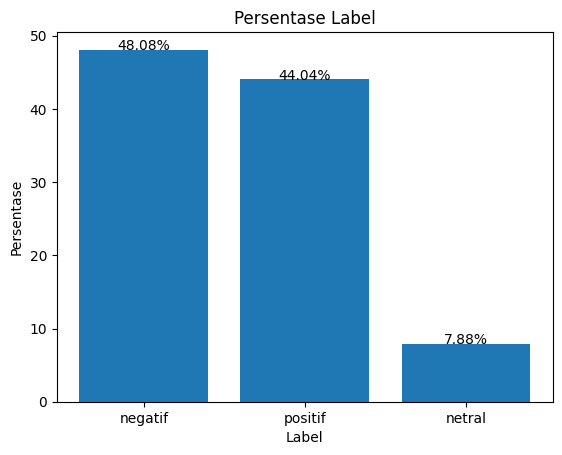

In [45]:
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()

label_percentages = label_counts / label_counts.sum() * 100

plt.bar(label_percentages.index, label_percentages.values)

plt.title('Persentase Label')
plt.xlabel('Label')
plt.ylabel('Persentase')

for i, percentage in enumerate(label_percentages):
    plt.text(i, percentage, f"{percentage:.2f}%", ha='center')

jumlah_label = df['label'].value_counts()

print(jumlah_label)

plt.show()

In [46]:
df[['tokens_stemmed', 'bobot_nilai_total', 'label']].to_csv('hasil4.csv',index=False, header=True)

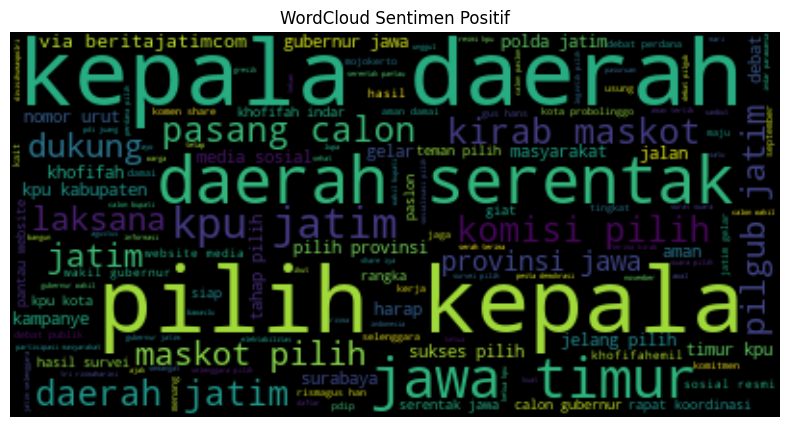

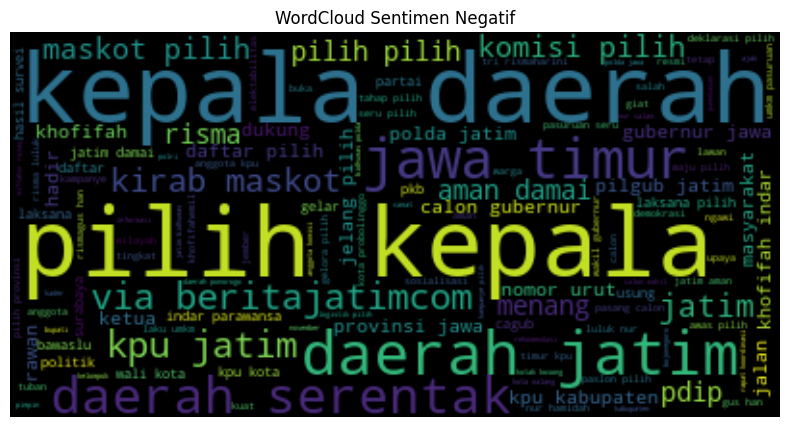

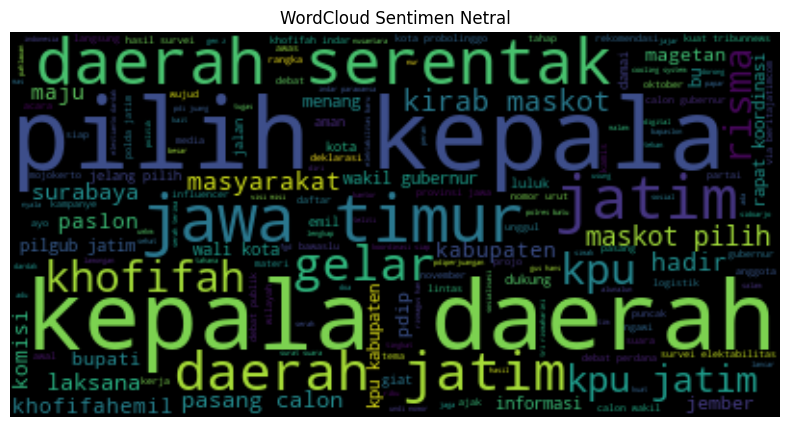

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


teks_positif = ' '.join([' '.join(tokens) for tokens in df[df['label'] == 'positif']['tokens_stemmed']])

teks_negatif = ' '.join([' '.join(tokens) for tokens in df[df['label'] == 'negatif']['tokens_stemmed']])

teks_netral = ' '.join([' '.join(tokens) for tokens in df[df['label'] == 'netral']['tokens_stemmed']])
wordcloud_positif = WordCloud().generate(teks_positif)

wordcloud_negatif = WordCloud().generate(teks_negatif)

wordcloud_netral = WordCloud().generate(teks_netral)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.title('WordCloud Sentimen Positif')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.title('WordCloud Sentimen Negatif')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_netral, interpolation='bilinear')
plt.title('WordCloud Sentimen Netral')
plt.axis('off')
plt.show()

Akurasi Naive Bayes: 0.6947115384615384
Classification Report Naive Bayes:
               precision    recall  f1-score   support

     negatif       0.74      0.75      0.75       216
      netral       0.00      0.00      0.00        29
     positif       0.64      0.74      0.69       171

    accuracy                           0.69       416
   macro avg       0.46      0.50      0.48       416
weighted avg       0.65      0.69      0.67       416



C:\Users\fajar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\fajar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\fajar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Akurasi Logistic Regression: 0.7451923076923077
Classification Report Logistic Regression:
               precision    recall  f1-score   support

     negatif       0.77      0.82      0.80       216
      netral       0.00      0.00      0.00        29
     positif       0.71      0.77      0.74       171

    accuracy                           0.75       416
   macro avg       0.49      0.53      0.51       416
weighted avg       0.69      0.75      0.72       416



C:\Users\fajar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\fajar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\fajar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

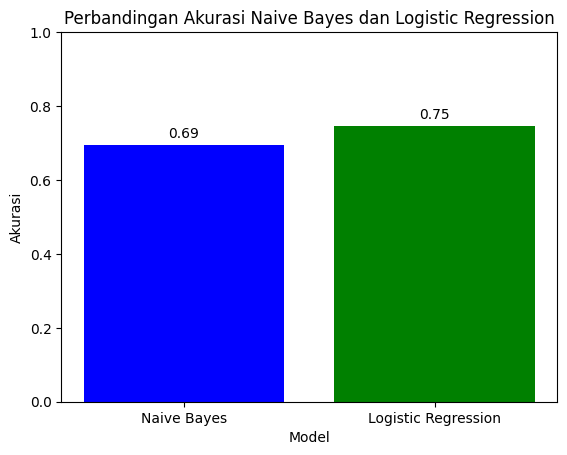

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Gabungkan token menjadi string
X = [' '.join(tokens) for tokens in df['tokens_stemmed']]  # Mengubah list token menjadi string
y = df['label']    # Menggunakan kolom label sebagai target

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah teks menjadi fitur numerik menggunakan TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Prediksi dan akurasi Naive Bayes
y_pred_nb = nb_model.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Akurasi Naive Bayes:", accuracy_nb)
print("Classification Report Naive Bayes:\n", classification_report(y_test, y_pred_nb))

# Model Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Prediksi dan akurasi Logistic Regression
y_pred_lr = lr_model.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Akurasi Logistic Regression:", accuracy_lr)
print("Classification Report Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# Komparasi Akurasi
accuracy_comparison = {
    'Naive Bayes': accuracy_nb,
    'Logistic Regression': accuracy_lr
}

# Plotting perbandingan akurasi
plt.bar(accuracy_comparison.keys(), accuracy_comparison.values(), color=['blue', 'green'])
plt.title('Perbandingan Akurasi Naive Bayes dan Logistic Regression')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)

for i, accuracy in enumerate(accuracy_comparison.values()):
    plt.text(i, accuracy + 0.02, f"{accuracy:.2f}", ha='center')

plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import pickle

# --- 1. Muat Data dari CSV ---
try:
    # Menggunakan nama file yang diunggah oleh pengguna
    nama_file_csv = 'hasil4.csv'
    df = pd.read_csv(nama_file_csv)
    print(f"File '{nama_file_csv}' berhasil dimuat.")
    print("Beberapa baris pertama data:")
    print(df.head())
    print("\nInfo dataset:")
    df.info()
except FileNotFoundError:
    print(f"Error: File '{nama_file_csv}' tidak ditemukan. Pastikan file tersebut ada di direktori yang sama.")
    exit()
except Exception as e:
    print(f"Error saat memuat atau membaca file CSV: {e}")
    exit()

# --- 2. Pra-pemrosesan Data (Asumsi dan Penyesuaian) ---
# Asumsi:
# - Kolom terakhir adalah variabel target (y).
# - Semua kolom lainnya adalah fitur (X).
# - Jika ada data kategorikal, kita akan mencoba mengonversinya menggunakan Label Encoding.
#   Anda mungkin perlu penanganan yang lebih canggih (misalnya, One-Hot Encoding)
#   tergantung pada sifat data Anda.

if df.empty:
    print("Error: DataFrame kosong setelah memuat CSV.")
    exit()

# Pisahkan fitur (X) dan target (y)
try:
    X = df.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir
    y = df.iloc[:, -1]   # Kolom terakhir sebagai target
except IndexError:
    print("Error: Tidak cukup kolom dalam CSV untuk memisahkan fitur dan target. Pastikan CSV memiliki setidaknya dua kolom.")
    exit()

print(f"\nKolom Fitur (X) dipilih: {X.columns.tolist()}")
print(f"Kolom Target (y) dipilih: {y.name}")

# Periksa apakah target adalah kategorikal dan perlu di-encode
if y.dtype == 'object' or y.dtype == 'category':
    print(f"\nTarget '{y.name}' adalah kategorikal. Melakukan Label Encoding...")
    le_y = LabelEncoder()
    y = le_y.fit_transform(y)
    print(f"Nilai unik setelah encoding pada target: {pd.Series(y).unique()}")
    # Simpan encoder target jika perlu untuk decode prediksi nanti
    with open('target_label_encoder.pkl', 'wb') as file:
        pickle.dump(le_y, file)
    print("Label encoder untuk target disimpan sebagai 'target_label_encoder.pkl'")


# Tangani fitur kategorikal di X menggunakan Label Encoding (contoh sederhana)
# Untuk penanganan yang lebih baik, pertimbangkan OneHotEncoder atau metode lain
X_processed = X.copy()
encoders = {} # Untuk menyimpan encoder setiap kolom fitur kategorikal

for column in X_processed.columns:
    if X_processed[column].dtype == 'object' or X_processed[column].dtype == 'category':
        print(f"Fitur '{column}' adalah kategorikal. Melakukan Label Encoding...")
        le_x = LabelEncoder()
        X_processed[column] = le_x.fit_transform(X_processed[column])
        encoders[column] = le_x # Simpan encoder untuk kolom ini
        print(f"Nilai unik setelah encoding pada fitur '{column}': {X_processed[column].unique()}")

if encoders:
    with open('feature_label_encoders.pkl', 'wb') as file:
        pickle.dump(encoders, file)
    print("Label encoders untuk fitur disimpan sebagai 'feature_label_encoders.pkl'")


# Periksa apakah ada nilai NaN setelah pra-pemrosesan
if X_processed.isnull().sum().sum() > 0:
    print("\nWarning: Terdapat nilai NaN dalam fitur setelah pra-pemrosesan. Pertimbangkan untuk mengimputasinya.")
    # Contoh imputasi sederhana (mengisi NaN dengan mean):
    # X_processed = X_processed.fillna(X_processed.mean())
    # print("Nilai NaN diimputasi dengan mean kolom.")

# --- 3. Bagi Data menjadi Set Pelatihan dan Pengujian ---
# test_size=0.2 berarti 20% data untuk pengujian, 80% untuk pelatihan.
# random_state untuk reproduktifitas.
try:
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
    print(f"\nData berhasil dibagi: {len(X_train)} sampel training, {len(X_test)} sampel testing.")
except Exception as e:
    print(f"Error saat membagi data: {e}")
    exit()

# --- 4. Latih Model Naive Bayes ---
print("\nMelatih model Naive Bayes (Gaussian)...")
nb_model = GaussianNB()
try:
    nb_model.fit(X_train, y_train)
    print("Model Naive Bayes berhasil dilatih.")
    # Evaluasi sederhana (opsional)
    accuracy_nb = nb_model.score(X_test, y_test)
    print(f"Akurasi Naive Bayes pada data tes: {accuracy_nb:.4f}")
except Exception as e:
    print(f"Error saat melatih model Naive Bayes: {e}")
    exit()

# --- 5. Latih Model Regresi Logistik ---
print("\nMelatih model Regresi Logistik...")
logreg_model = LogisticRegression(solver='liblinear', max_iter=200, random_state=42) # max_iter bisa disesuaikan
try:
    logreg_model.fit(X_train, y_train)
    print("Model Regresi Logistik berhasil dilatih.")
    # Evaluasi sederhana (opsional)
    accuracy_logreg = logreg_model.score(X_test, y_test)
    print(f"Akurasi Regresi Logistik pada data tes: {accuracy_logreg:.4f}")
except Exception as e:
    print(f"Error saat melatih model Regresi Logistik: {e}")
    exit()

# --- 6. Simpan Model ke File .pkl ---
# Simpan model Naive Bayes
nama_file_nb_pkl = 'naive_bayes_model.pkl'
with open(nama_file_nb_pkl, 'wb') as file:
    pickle.dump(nb_model, file)
print(f"\nModel Naive Bayes disimpan sebagai '{nama_file_nb_pkl}'")

# Simpan model Regresi Logistik
nama_file_logreg_pkl = 'logistic_regression_model.pkl'
with open(nama_file_logreg_pkl, 'wb') as file:
    pickle.dump(logreg_model, file)
print(f"Model Regresi Logistik disimpan sebagai '{nama_file_logreg_pkl}'")

print("\nProses selesai! 🎉")

PENTING: Pastikan Anda memuat data Anda ke dalam DataFrame 'df' di atas bagian ini.
DataFrame 'df' kosong atau tidak memiliki kolom 'tokens_no_stopwords' yang valid.
Silakan muat data Anda dengan benar sebelum melanjutkan.


In [41]:
from nltk.tokenize import sent_tokenize

# Fungsi untuk klasifikasi per kalimat
def classify_sentence(sentence, vectorizer, nb_model, lr_model):
    sentence_tfidf = vectorizer.transform([sentence])
    pred_nb = nb_model.predict(sentence_tfidf)
    pred_lr = lr_model.predict(sentence_tfidf)
    return pred_nb[0], pred_lr[0]

# Fungsi untuk klasifikasi per kata
def classify_word(word, positif_lexicon, negatif_lexicon):
    positif_weight = positif_lexicon.get(word, 0)
    negatif_weight = negatif_lexicon.get(word, 0)
    if positif_weight > 0:
        return 'positif'
    elif negatif_weight < 0:
        return 'negatif'
    else:
        return 'netral'

# Klasifikasi per kalimat
sentences = []
nb_labels_sentence = []
lr_labels_sentence = []
for full_text in df['tokens_stemmed'].head(10):  # Menampilkan 10 data pertama
    sentence_list = sent_tokenize(full_text)  # Pisahkan menjadi kalimat-kalimat
    for sentence in sentence_list:
        sentences.append(sentence)
        nb_label, lr_label = classify_sentence(sentence, vectorizer, nb_model, lr_model)
        nb_labels_sentence.append(nb_label)
        lr_labels_sentence.append(lr_label)

# Klasifikasi per kata
words = []
nb_labels_word = []
lr_labels_word = []
for token_list in df['tokens_stemmed'].head(10):  # Menampilkan 10 data pertama
    for word in token_list:
        words.append(word)
        nb_labels_word.append(classify_word(word, positif_lexicon, negatif_lexicon))  # Gunakan lexicon untuk klasifikasi kata
        lr_labels_word.append(classify_word(word, positif_lexicon, negatif_lexicon))

# Menampilkan hasil klasifikasi per kalimat dan per kata
sentence_results = pd.DataFrame({
    'sentence': sentences,
    'label_nb': nb_labels_sentence,
    'label_lr': lr_labels_sentence
})

word_results = pd.DataFrame({
    'word': words,
    'label_nb': nb_labels_word,
    'label_lr': lr_labels_word
})

# Menampilkan 10 data pertama untuk klasifikasi per kalimat dan per kata
display(sentence_results.head(10))
display(word_results.head(10))


TypeError: expected string or bytes-like object, got 'list'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import pickle

# --- 1. Muat Data dari CSV ---
try:
    # Menggunakan nama file yang diunggah oleh pengguna
    nama_file_csv = 'hasil4.csv'
    df = pd.read_csv(nama_file_csv)
    print(f"File '{nama_file_csv}' berhasil dimuat.")
    print("Beberapa baris pertama data:")
    print(df.head())
    print("\nInfo dataset:")
    df.info()
except FileNotFoundError:
    print(f"Error: File '{nama_file_csv}' tidak ditemukan. Pastikan file tersebut ada di direktori yang sama.")
    exit()
except Exception as e:
    print(f"Error saat memuat atau membaca file CSV: {e}")
    exit()

# --- 2. Pra-pemrosesan Data (Asumsi dan Penyesuaian) ---
# Asumsi:
# - Kolom terakhir adalah variabel target (y).
# - Semua kolom lainnya adalah fitur (X).
# - Jika ada data kategorikal, kita akan mencoba mengonversinya menggunakan Label Encoding.
#   Anda mungkin perlu penanganan yang lebih canggih (misalnya, One-Hot Encoding)
#   tergantung pada sifat data Anda.

if df.empty:
    print("Error: DataFrame kosong setelah memuat CSV.")
    exit()

# Pisahkan fitur (X) dan target (y)
try:
    X = df.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir
    y = df.iloc[:, -1]   # Kolom terakhir sebagai target
except IndexError:
    print("Error: Tidak cukup kolom dalam CSV untuk memisahkan fitur dan target. Pastikan CSV memiliki setidaknya dua kolom.")
    exit()

print(f"\nKolom Fitur (X) dipilih: {X.columns.tolist()}")
print(f"Kolom Target (y) dipilih: {y.name}")

# Periksa apakah target adalah kategorikal dan perlu di-encode
if y.dtype == 'object' or y.dtype == 'category':
    print(f"\nTarget '{y.name}' adalah kategorikal. Melakukan Label Encoding...")
    le_y = LabelEncoder()
    y = le_y.fit_transform(y)
    print(f"Nilai unik setelah encoding pada target: {pd.Series(y).unique()}")
    # Simpan encoder target jika perlu untuk decode prediksi nanti
    with open('target_label_encoder.pkl', 'wb') as file:
        pickle.dump(le_y, file)
    print("Label encoder untuk target disimpan sebagai 'target_label_encoder.pkl'")


# Tangani fitur kategorikal di X menggunakan Label Encoding (contoh sederhana)
# Untuk penanganan yang lebih baik, pertimbangkan OneHotEncoder atau metode lain
X_processed = X.copy()
encoders = {} # Untuk menyimpan encoder setiap kolom fitur kategorikal

for column in X_processed.columns:
    if X_processed[column].dtype == 'object' or X_processed[column].dtype == 'category':
        print(f"Fitur '{column}' adalah kategorikal. Melakukan Label Encoding...")
        le_x = LabelEncoder()
        X_processed[column] = le_x.fit_transform(X_processed[column])
        encoders[column] = le_x # Simpan encoder untuk kolom ini
        print(f"Nilai unik setelah encoding pada fitur '{column}': {X_processed[column].unique()}")

if encoders:
    with open('feature_label_encoders.pkl', 'wb') as file:
        pickle.dump(encoders, file)
    print("Label encoders untuk fitur disimpan sebagai 'feature_label_encoders.pkl'")


# Periksa apakah ada nilai NaN setelah pra-pemrosesan
if X_processed.isnull().sum().sum() > 0:
    print("\nWarning: Terdapat nilai NaN dalam fitur setelah pra-pemrosesan. Pertimbangkan untuk mengimputasinya.")
    # Contoh imputasi sederhana (mengisi NaN dengan mean):
    # X_processed = X_processed.fillna(X_processed.mean())
    # print("Nilai NaN diimputasi dengan mean kolom.")

# --- 3. Bagi Data menjadi Set Pelatihan dan Pengujian ---
# test_size=0.2 berarti 20% data untuk pengujian, 80% untuk pelatihan.
# random_state untuk reproduktifitas.
try:
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
    print(f"\nData berhasil dibagi: {len(X_train)} sampel training, {len(X_test)} sampel testing.")
except Exception as e:
    print(f"Error saat membagi data: {e}")
    exit()

# --- 4. Latih Model Naive Bayes ---
print("\nMelatih model Naive Bayes (Gaussian)...")
nb_model = GaussianNB()
try:
    nb_model.fit(X_train, y_train)
    print("Model Naive Bayes berhasil dilatih.")
    # Evaluasi sederhana (opsional)
    accuracy_nb = nb_model.score(X_test, y_test)
    print(f"Akurasi Naive Bayes pada data tes: {accuracy_nb:.4f}")
except Exception as e:
    print(f"Error saat melatih model Naive Bayes: {e}")
    exit()

# --- 5. Latih Model Regresi Logistik ---
print("\nMelatih model Regresi Logistik...")
logreg_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, C=1.0, class_weight='balanced') # max_iter bisa disesuaikan
try:
    logreg_model.fit(X_train, y_train)
    print("Model Regresi Logistik berhasil dilatih.")
    # Evaluasi sederhana (opsional)
    accuracy_logreg = logreg_model.score(X_test, y_test)
    print(f"Akurasi Regresi Logistik pada data tes: {accuracy_logreg:.4f}")
except Exception as e:
    print(f"Error saat melatih model Regresi Logistik: {e}")
    exit()

# --- 6. Simpan Model ke File .pkl ---
# Simpan model Naive Bayes
nama_file_nb_pkl = 'naive_bayes_model.pkl'
with open(nama_file_nb_pkl, 'wb') as file:
    pickle.dump(nb_model, file)
print(f"\nModel Naive Bayes disimpan sebagai '{nama_file_nb_pkl}'")

# Simpan model Regresi Logistik
nama_file_logreg_pkl = 'logistic_regression_model.pkl'
with open(nama_file_logreg_pkl, 'wb') as file:
    pickle.dump(logreg_model, file)
print(f"Model Regresi Logistik disimpan sebagai '{nama_file_logreg_pkl}'")

print("\nProses selesai! 🎉")

File 'hasil4.csv' berhasil dimuat.
Beberapa baris pertama data:
                                      tokens_stemmed  bobot_nilai_total  \
0                    ['rocky', 'gerung', 'oligarki']                  0   
1  ['kpu', 'kota', 'probolinggo', 'gelar', 'debat...                  0   
2         ['urban', 'festival', 'lho', 'seruseruan']                  0   
3  ['semanggi', 'suroboyo', 'bikin', 'suasana', '...                  4   
4   ['jumat', 'nov', 'tulis', 'kalender', 'tinggal']                  0   

     label  
0   netral  
1   netral  
2   netral  
3  positif  
4   netral  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tokens_stemmed     2080 non-null   object
 1   bobot_nilai_total  2080 non-null   int64 
 2   label              2080 non-null   object
dtypes: int64(1), object(2)
memory usage: 48.9+ KB


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import joblib
import ast # Untuk evaluasi string list yang lebih aman

# --- Konfigurasi ---
NAMA_FILE_CSV = 'hasil4.csv'
KOLOM_TEKS_INPUT = 'tokens_stemmed'
KOLOM_LABEL = 'label'

FILE_VECTORIZER_PKL = 'vectorizer.pkl'
FILE_NAIVE_BAYES_PKL = 'naive_bayes_model.pkl'
FILE_LOGISTIC_REGRESSION_PKL = 'logistic_regression_model.pkl'
FILE_LABEL_ENCODER_PKL = 'text_label_encoder.pkl'

# --- Fungsi untuk Pra-pemrosesan Kolom Teks ---
def preprocess_text_input_column(series_text, column_name_for_log):
    print(f"Memulai pra-pemrosesan untuk kolom teks: '{column_name_for_log}'...")
    first_valid_entry = None
    if not series_text.dropna().empty:
        first_valid_entry = series_text.dropna().iloc[0]
    
    def convert_stringified_list_to_text(s):
        if pd.isna(s) or not isinstance(s, str): return ""
        try:
            list_of_tokens = ast.literal_eval(s)
            return ' '.join(map(str, list_of_tokens)) if isinstance(list_of_tokens, list) else s
        except (ValueError, SyntaxError, TypeError): return s

    if isinstance(first_valid_entry, str) and first_valid_entry.startswith('[') and first_valid_entry.endswith(']'):
        print(f"Kolom '{column_name_for_log}' terdeteksi kemungkinan sebagai stringified list. Mencoba konversi...")
        processed_series = series_text.apply(convert_stringified_list_to_text)
    else:
        print(f"Kolom '{column_name_for_log}' dianggap sebagai teks biasa. Memastikan tipe string.")
        processed_series = series_text.astype(str).fillna('')
        
    print(f"Pra-pemrosesan kolom '{column_name_for_log}' selesai.")
    return processed_series

# --- 1. Muat Data dari CSV ---
print(f"Memuat dataset dari '{NAMA_FILE_CSV}'...")
try:
    df = pd.read_csv(NAMA_FILE_CSV)
    print(f"Dataset berhasil dimuat. Jumlah baris awal: {len(df)}")
except FileNotFoundError:
    print(f"Error: File '{NAMA_FILE_CSV}' tidak ditemukan."); exit()
except Exception as e:
    print(f"Error saat memuat CSV: {e}"); exit()

# --- Validasi Kolom dan Penanganan NaN ---
if KOLOM_TEKS_INPUT not in df.columns:
    print(f"Error: Kolom teks '{KOLOM_TEKS_INPUT}' tidak ada. Kolom tersedia: {df.columns.tolist()}"); exit()
if KOLOM_LABEL not in df.columns:
    print(f"Error: Kolom label '{KOLOM_LABEL}' tidak ada. Kolom tersedia: {df.columns.tolist()}"); exit()

df.dropna(subset=[KOLOM_TEKS_INPUT, KOLOM_LABEL], inplace=True)
df.reset_index(drop=True, inplace=True)
if len(df) == 0:
    print("Error: Tidak ada data valid setelah menghapus NaN."); exit()
print(f"Jumlah baris setelah menghapus NaN: {len(df)}")

# --- (*) Cek Distribusi Kelas ---
print("\nDistribusi Label Awal:")
print(df[KOLOM_LABEL].value_counts())
print("\nProporsi Label Awal:")
print(df[KOLOM_LABEL].value_counts(normalize=True))
print("-" * 30)

# --- 2. Siapkan Fitur (X) dan Target (y) ---
X_texts_processed = preprocess_text_input_column(df[KOLOM_TEKS_INPUT], KOLOM_TEKS_INPUT)
y_labels_raw = df[KOLOM_LABEL]

print("\nMelakukan Label Encoding untuk kolom target...")
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_labels_raw)
print(f"Kelas label yang di-encode: {list(label_encoder.classes_)}")
joblib.dump(label_encoder, FILE_LABEL_ENCODER_PKL)
print(f"Label Encoder disimpan sebagai '{FILE_LABEL_ENCODER_PKL}'")

# --- 3. Vektorisasi Teks (TF-IDF) ---
print("\nMenginisialisasi dan fitting TF-IDF Vectorizer...")
vectorizer = TfidfVectorizer(
    max_df=0.90,
    min_df=3,            # Penyesuaian: sedikit menaikkan min_df (eksperimen)
    ngram_range=(1, 2),
    stop_words=None 
)
X_vectorized = vectorizer.fit_transform(X_texts_processed)
print(f"Teks berhasil divektorisasi. Shape matriks fitur: {X_vectorized.shape}")
joblib.dump(vectorizer, FILE_VECTORIZER_PKL)
print(f"Vectorizer (TF-IDF) disimpan sebagai '{FILE_VECTORIZER_PKL}'")

# --- 4. Bagi Data menjadi Set Pelatihan dan Pengujian ---
print("\nMembagi data menjadi set pelatihan dan pengujian...")
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print(f"Ukuran data pelatihan: {X_train.shape[0]}, Ukuran data pengujian: {X_test.shape[0]}")

# --- 5. Latih Model Naive Bayes (MultinomialNB) ---
print("\nMelatih model Naive Bayes (MultinomialNB)...")
nb_model = MultinomialNB(alpha=1.0)
nb_model.fit(X_train, y_train)
print("Model Naive Bayes (MultinomialNB) berhasil dilatih.")
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Akurasi Naive Bayes (MultinomialNB) pada data tes: {accuracy_nb:.4f}")
print("Laporan Klasifikasi Naive Bayes (MultinomialNB):")
print(classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_, zero_division=0))
joblib.dump(nb_model, FILE_NAIVE_BAYES_PKL)
print(f"Model Naive Bayes (MultinomialNB) disimpan sebagai '{FILE_NAIVE_BAYES_PKL}'")

# --- 6. Latih Model Regresi Logistik ---
print("\nMelatih model Regresi Logistik...")
logreg_model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42,
    C=1.0,
    class_weight='balanced'  # (*) PENTING: Menggunakan class_weight untuk menangani ketidakseimbangan kelas
)
logreg_model.fit(X_train, y_train)
print("Model Regresi Logistik berhasil dilatih.")
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Akurasi Regresi Logistik pada data tes: {accuracy_logreg:.4f}")
print("Laporan Klasifikasi Regresi Logistik:")
print(classification_report(y_test, y_pred_logreg, target_names=label_encoder.classes_, zero_division=0))
joblib.dump(logreg_model, FILE_LOGISTIC_REGRESSION_PKL)
print(f"Model Regresi Logistik disimpan sebagai '{FILE_LOGISTIC_REGRESSION_PKL}'")

print("\n--- PROSES PELATIHAN DAN PENYIMPANAN MODEL SELESAI ---")
print("File-file .pkl telah diperbarui/dibuat dan siap digunakan di aplikasi Flask Anda.")

Memuat dataset dari 'hasil4.csv'...
Dataset berhasil dimuat. Jumlah baris awal: 2080
Jumlah baris setelah menghapus NaN: 2080

Distribusi Label Awal:
label
negatif    1000
positif     916
netral      164
Name: count, dtype: int64

Proporsi Label Awal:
label
negatif    0.480769
positif    0.440385
netral     0.078846
Name: proportion, dtype: float64
------------------------------
Memulai pra-pemrosesan untuk kolom teks: 'tokens_stemmed'...
Kolom 'tokens_stemmed' terdeteksi kemungkinan sebagai stringified list. Mencoba konversi...
Pra-pemrosesan kolom 'tokens_stemmed' selesai.

Melakukan Label Encoding untuk kolom target...
Kelas label yang di-encode: ['negatif', 'netral', 'positif']
Label Encoder disimpan sebagai 'text_label_encoder.pkl'

Menginisialisasi dan fitting TF-IDF Vectorizer...
Teks berhasil divektorisasi. Shape matriks fitur: (2080, 3014)
Vectorizer (TF-IDF) disimpan sebagai 'vectorizer.pkl'

Membagi data menjadi set pelatihan dan pengujian...
Ukuran data pelatihan: 1664, Uku

In [52]:
import pandas as pd
import ast # Untuk mengubah string list menjadi list Python secara aman

# --- Konfigurasi ---
NAMA_FILE_INPUT_CSV = 'hasil4.csv'
# Ganti nama kolom ini jika nama kolom teks di CSV Anda berbeda
KOLOM_TEKS_UNTUK_DIPROSES = 'tokens_stemmed'
# Nama file CSV output yang akan berisi kolom teks dalam format string bersih
NAMA_FILE_OUTPUT_CSV = 'hasil4_dataset_string.csv'

# --- Fungsi untuk Mengonversi Stringified List menjadi Teks String ---
def konversi_ke_string_teks(nilai_sel):
    """
    Mengonversi nilai sel. Jika nilai tersebut adalah string yang merepresentasikan list,
    ia akan diubah menjadi string tunggal yang dipisahkan spasi.
    Jika tidak, ia akan dikonversi ke string biasa.
    """
    if pd.isna(nilai_sel):
        return "" # Kembalikan string kosong jika nilai adalah NaN

    if isinstance(nilai_sel, str) and nilai_sel.startswith('[') and nilai_sel.endswith(']'):
        try:
            # ast.literal_eval lebih aman daripada eval()
            # Mengubah "['a', 'b']" menjadi list Python ['a', 'b']
            list_of_tokens = ast.literal_eval(nilai_sel)
            if isinstance(list_of_tokens, list):
                # Gabungkan semua elemen dalam list menjadi satu string, dipisahkan spasi
                # Pastikan semua elemen dikonversi ke string sebelum join
                return ' '.join(map(str, list_of_tokens))
            else:
                # Jika hasil eval bukan list, kemungkinan ini string biasa yang kebetulan diawali/diakhiri kurung siku
                return str(nilai_sel)
        except (ValueError, SyntaxError, TypeError):
            # Jika ast.literal_eval gagal (misalnya, formatnya tidak valid atau memang string biasa)
            # Kembalikan nilai sel sebagai string apa adanya
            return str(nilai_sel)
    else:
        # Jika bukan stringified list, pastikan itu adalah string
        return str(nilai_sel)

# --- Proses Utama ---
def buat_dataset_string():
    print(f"Membaca file input: {NAMA_FILE_INPUT_CSV}...")
    try:
        df = pd.read_csv(NAMA_FILE_INPUT_CSV)
        print(f"Dataset berhasil dimuat. Jumlah baris: {len(df)}")
    except FileNotFoundError:
        print(f"Error: File '{NAMA_FILE_INPUT_CSV}' tidak ditemukan.")
        return
    except Exception as e:
        print(f"Error saat membaca CSV: {e}")
        return

    # Periksa apakah kolom teks yang ditentukan ada
    if KOLOM_TEKS_UNTUK_DIPROSES not in df.columns:
        print(f"Error: Kolom '{KOLOM_TEKS_UNTUK_DIPROSES}' tidak ditemukan dalam CSV.")
        print(f"Kolom yang tersedia adalah: {df.columns.tolist()}")
        return

    print(f"Memproses kolom '{KOLOM_TEKS_UNTUK_DIPROSES}' menjadi format string teks...")
    
    # Buat kolom baru atau timpa kolom yang ada dengan versi string yang sudah diproses
    # Untuk keamanan, kita buat kolom baru dulu, misal 'text_string'
    # Jika ingin menimpa, gunakan: df[KOLOM_TEKS_UNTUK_DIPROSES] = df[KOLOM_TEKS_UNTUK_DIPROSES].apply(konversi_ke_string_teks)
    
    nama_kolom_string_baru = f"{KOLOM_TEKS_UNTUK_DIPROSES}_string" # Contoh nama kolom baru
    df[nama_kolom_string_baru] = df[KOLOM_TEKS_UNTUK_DIPROSES].apply(konversi_ke_string_teks)
    
    print(f"Kolom '{KOLOM_TEKS_UNTUK_DIPROSES}' telah diproses dan hasilnya disimpan di kolom '{nama_kolom_string_baru}'.")
    print("Contoh hasil pemrosesan:")
    print(df[[KOLOM_TEKS_UNTUK_DIPROSES, nama_kolom_string_baru]].head())

    # Menyimpan DataFrame yang sudah dimodifikasi ke file CSV baru
    try:
        df.to_csv(NAMA_FILE_OUTPUT_CSV, index=False)
        print(f"\nDataset dengan kolom teks yang sudah diubah menjadi string telah disimpan sebagai: {NAMA_FILE_OUTPUT_CSV}")
        print("Anda sekarang bisa menggunakan file CSV baru ini untuk pengujian atau pelatihan model,")
        print(f"dengan menggunakan kolom '{nama_kolom_string_baru}' sebagai input teks Anda.")
    except Exception as e:
        print(f"Error saat menyimpan CSV baru: {e}")

if __name__ == '__main__':
    buat_dataset_string()

Membaca file input: hasil4.csv...
Dataset berhasil dimuat. Jumlah baris: 2080
Memproses kolom 'tokens_stemmed' menjadi format string teks...
Kolom 'tokens_stemmed' telah diproses dan hasilnya disimpan di kolom 'tokens_stemmed_string'.
Contoh hasil pemrosesan:
                                      tokens_stemmed  \
0                    ['rocky', 'gerung', 'oligarki']   
1  ['kpu', 'kota', 'probolinggo', 'gelar', 'debat...   
2         ['urban', 'festival', 'lho', 'seruseruan']   
3  ['semanggi', 'suroboyo', 'bikin', 'suasana', '...   
4   ['jumat', 'nov', 'tulis', 'kalender', 'tinggal']   

                               tokens_stemmed_string  
0                              rocky gerung oligarki  
1  kpu kota probolinggo gelar debat publik tiga p...  
2                      urban festival lho seruseruan  
3              semanggi suroboyo bikin suasana pecah  
4                   jumat nov tulis kalender tinggal  

Dataset dengan kolom teks yang sudah diubah menjadi string telah disimpa